In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import xarray as xr

import esmtools as et
from esmtools import stats

import shapefile
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gp
import regionmask
import matplotlib.patches as mpatches

In [4]:
# Open dataset 
dir = '/chinook/dallmann/SOARS/'
fn = 'tos_Omon_CESM2_omip2_r1i1p1f1_gr_030601-036612.nc'

data_tos = xr.open_dataset(dir+fn)
data_tos

/opt/miniconda3/envs/prod/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset>
Dimensions:    (d2: 2, lat: 180, lon: 360, time: 732)
Coordinates:
  * time       (time) object 0306-01-15 12:00:00 ... 0366-12-15 12:00:00
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) object ...
    lat_bnds   (lat, d2) float64 ...
    lon_bnds   (lon, d2) float64 ...
    tos        (time, lat, lon) float32 ...
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            OMIP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    case_id:                1540
    ...                     ...
    tracking_id:            hdl:21.14100/035f5fb2-1e7b-46a3-a72f-268f1f6ea194
    variable_id:            tos
    variant_info:           CMIP6 omip2 experiment (JRA forcing) with interac...
    variant_label:          r1i1p1f1
    source_type:            OGCM BGC
    comment:                Experiment run for 6 cycles of 1958-2018 JRA55 fo...

In [3]:
# Change the time to be from DatetimeNoLeap to a Datetime64
data_tos['time'] = np.arange('1958-01-01','2019-01-01',dtype = 'datetime64[M]')
data_tos

<xarray.Dataset>
Dimensions:    (d2: 2, lat: 180, lon: 360, time: 732)
Coordinates:
  * time       (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2018-12-01
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) object 0306-01-01 00:00:00 ... 0367-01-01 00:00:00
    lat_bnds   (lat, d2) float64 -90.0 -89.0 -89.0 -88.0 ... 88.0 89.0 89.0 90.0
    lon_bnds   (lon, d2) float64 0.0 1.0 1.0 2.0 2.0 ... 358.0 359.0 359.0 360.0
    tos        (time, lat, lon) float32 ...
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            OMIP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    case_id:                1540
    ...                     ...
    tracking_id:            hdl:21.14100/035f5fb2-1e7b-46a3-a72f-268f1f6ea194
    variable_id:            tos
    variant_info:           CMIP6 omip2 experiment (JRA forcing) with interac...
    variant_label:          r1i1p1f1
    source_type:            OGCM BGC
    comment:                Experiment run for 6 cycles of 1958-2018 JRA55 fo...

In [4]:
# select dimensions!
data_tos['time'] = pd.date_range("1958-01", "2018-12", freq="MS")
tos = data_tos['tos']
tos = tos.sel(lon=slice(190,270),lat=slice(-10,70))

In [5]:
# remove long term trend for each grid cell
var = stats.rm_poly(tos,order=2,dim='time',nan_policy='drop')
var

<xarray.DataArray (lat: 80, lon: 80, time: 732)>
array([[[ 0.64056346,  1.03465678,  0.96709999, ..., -0.31297091,
          0.19244832,  0.33792238],
        [ 0.65201893,  0.99782975,  0.96215817, ..., -0.33340774,
          0.21214267,  0.3403061 ],
        [ 0.66638565,  0.93020369,  0.97593941, ..., -0.35592969,
          0.21646563,  0.34909956],
        ...,
        [ 0.57536444,  1.5197918 ,  2.51129781, ..., -2.02905911,
         -1.77885703, -1.03990966],
        [ 0.65089934,  1.62743523,  2.68551898, ..., -2.11259491,
         -1.78684148, -0.97435887],
        [ 0.74220879,  1.75964174,  2.86663059, ..., -2.19058485,
         -1.79022755, -0.91320124]],

       [[ 0.60283499,  0.92933274,  0.97711319, ..., -0.20426293,
          0.25543675,  0.37590136],
        [ 0.60851026,  0.91045294,  0.98523522, ..., -0.21855914,
          0.26655629,  0.36258349],
        [ 0.61796213,  0.87441248,  1.01414902, ..., -0.23558296,
          0.26560058,  0.34151329],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-1.95620431, -1.96547778, -1.98530006, ...,  4.90535724,
          1.55117951, -2.24109117],
        [-2.11748259, -2.12626636, -2.14835695, ...,  4.88507259,
          1.24261032, -2.45260808],
        [-2.21520874, -2.22448092, -2.24890683, ...,  4.8112266 ,
          0.85935307, -2.66507613],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.55518915, -0.5655916 , -0.57452067, ..., -0.2203095 ,
         -0.7560343 , -0.77825752]]])
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2018-12-01
  * lat      (lat) float64 -9.5 -8.5 -7.5 -6.5 -5.5 ... 65.5 66.5 67.5 68.5 69.5
  * lon      (lon) float64 190.5 191.5 192.5 193.5 ... 266.5 267.5 268.5 269.5

In [6]:
# 1982-2010 period
base = var.sel(time=slice('1982-01','2010-12'))
tos_base = base
tos_base

<xarray.DataArray (lat: 80, lon: 80, time: 348)>
array([[[ 0.06384714,  0.25971397,  0.23060959, ..., -0.54175146,
         -0.50153979, -0.56201098],
        [ 0.06301214,  0.18894965,  0.19161103, ..., -0.58170998,
         -0.54129101, -0.58473208],
        [ 0.07634902,  0.13170322,  0.15266883, ..., -0.61536368,
         -0.57379868, -0.60098704],
        ...,
        [ 0.34274836,  1.31485846,  1.89065861, ..., -2.76007667,
         -2.49326905, -1.90033003],
        [ 0.42639274,  1.41977654,  1.96795903, ..., -2.88911567,
         -2.58059079, -1.90236882],
        [ 0.5456311 ,  1.53152355,  2.0427057 , ..., -3.03048991,
         -2.67697182, -1.88619328]],

       [[-0.05364711,  0.09380252,  0.10750548, ..., -0.6674194 ,
         -0.72012971, -0.84220885],
        [-0.04566177,  0.0511122 ,  0.07761698, ..., -0.71154842,
         -0.76171227, -0.87193191],
        [-0.0135131 ,  0.01618794,  0.05453209, ..., -0.74772223,
         -0.79966729, -0.90259316],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-1.97553283, -1.9880196 , -1.99853401, ...,  3.24561908,
         -0.83063956, -2.46193858],
        [-2.12059886, -2.13079686, -2.14192236, ...,  3.09049352,
         -1.31655123, -2.61458996],
        [-2.20017861, -2.20880077, -2.22101895, ...,  2.90791237,
         -1.69964162, -2.70201699],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.56882535, -0.58107716, -0.59123232, ...,  0.96439815,
         -0.55248142, -0.70533311]]])
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2010-12-01
  * lat      (lat) float64 -9.5 -8.5 -7.5 -6.5 -5.5 ... 65.5 66.5 67.5 68.5 69.5
  * lon      (lon) float64 190.5 191.5 192.5 193.5 ... 266.5 267.5 268.5 269.5

In [7]:
# Blob period
blob = var.sel(time=slice('2013-07','2016-06'))
tos_blob = blob
tos_blob

<xarray.DataArray (lat: 80, lon: 80, time: 36)>
array([[[-0.49290701, -0.59230243, -0.45034248, ...,  0.98383337,
          0.68797099,  0.23273947],
        [-0.50123222, -0.61630177, -0.47208112, ...,  1.04375874,
          0.72076192,  0.27481311],
        [-0.50890924, -0.63162214, -0.48662396, ...,  1.08673749,
          0.7581958 ,  0.33005873],
        ...,
        [-0.99066575, -1.9359602 , -2.38162502, ...,  3.21010461,
          2.75611023,  1.92715879],
        [-1.09560025, -2.06035578, -2.50560521, ...,  3.31493572,
          2.78436645,  1.87757939],
        [-1.2028754 , -2.19048428, -2.62563756, ...,  3.40699208,
          2.79650624,  1.84024285]],

       [[-0.40240868, -0.47794287, -0.32104905, ...,  1.06014787,
          0.78432077,  0.41341062],
        [-0.3994138 , -0.49301538, -0.33743471, ...,  1.12215517,
          0.82245851,  0.45360627],
        [-0.39900365, -0.49811518, -0.34358508, ...,  1.15572208,
          0.87117006,  0.5075025 ],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 1.94988757,  3.825972  ,  4.01691384, ..., -2.74583291,
         -2.67691445, -1.75965873],
        [ 2.51180335,  4.11394096,  4.14451953, ..., -2.89369942,
         -2.80079256, -1.50199833],
        [ 2.81957135,  4.3238881 ,  4.25044003, ..., -2.97120125,
         -2.84502268, -1.11559696],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 0.16260916,  2.81976615,  1.69804723, ..., -0.79812509,
         -0.79816477, -0.70007067]]])
Coordinates:
  * time     (time) datetime64[ns] 2013-07-01 2013-08-01 ... 2016-06-01
  * lat      (lat) float64 -9.5 -8.5 -7.5 -6.5 -5.5 ... 65.5 66.5 67.5 68.5 69.5
  * lon      (lon) float64 190.5 191.5 192.5 193.5 ... 266.5 267.5 268.5 269.5

In [8]:
# Difference between the two periods
blob_anom = blob.groupby('time.month') - base.groupby('time.month').mean()
blob_anom

<xarray.DataArray (lat: 80, lon: 80, time: 36)>
array([[[-0.1019707 , -0.04190776, -0.03324991, ...,  0.58069162,
          0.37175606,  0.27763307],
        [-0.11777498, -0.07007815, -0.06036334, ...,  0.64113354,
          0.40154801,  0.31478527],
        [-0.13877042, -0.09782999, -0.0855972 , ...,  0.68779974,
          0.43433354,  0.36125645],
        ...,
        [-0.6024078 , -0.57290804, -0.48194831, ...,  0.863645  ,
          0.96053269,  1.15571814],
        [-0.60304624, -0.56850541, -0.49046808, ...,  0.88560973,
          0.95172494,  1.1399499 ],
        [-0.59112367, -0.57058069, -0.50009806, ...,  0.89269193,
          0.93867668,  1.15677868]],

       [[-0.08637218, -0.02271517,  0.01023662, ...,  0.71986485,
          0.4796326 ,  0.41660526],
        [-0.08990465, -0.03849403, -0.00817638, ...,  0.78094355,
          0.51083087,  0.45153464],
        [-0.10116255, -0.05136888, -0.02249356, ...,  0.81458139,
          0.55142204,  0.49680988],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.60285588, -1.07345656, -0.60795859, ..., -0.50599154,
         -0.48419551, -0.69990636],
        [-0.46421931, -1.08865223, -0.61910306, ..., -0.51250683,
         -0.48878886, -0.60890851],
        [-0.43861301, -1.08554022, -0.62315741, ..., -0.51607789,
         -0.49227873, -0.37191366],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.16292149,  0.04107386, -0.55336437, ..., -0.13672996,
         -0.13645761, -0.11695384]]])
Coordinates:
  * time     (time) datetime64[ns] 2013-07-01 2013-08-01 ... 2016-06-01
  * lat      (lat) float64 -9.5 -8.5 -7.5 -6.5 -5.5 ... 65.5 66.5 67.5 68.5 69.5
  * lon      (lon) float64 190.5 191.5 192.5 193.5 ... 266.5 267.5 268.5 269.5
    month    (time) int64 7 8 9 10 11 12 1 2 3 4 5 ... 8 9 10 11 12 1 2 3 4 5 6

In [9]:
# Resample to two month resolution
fosi = blob_anom.resample(time='2M').mean()
fosi

<xarray.DataArray (lat: 80, lon: 80, time: 19)>
array([[[-0.1019707 , -0.03757884, -0.22472851, ...,  0.45886758,
          0.47622384,  0.27763307],
        [-0.11777498, -0.06522075, -0.22076811, ...,  0.48966748,
          0.52134078,  0.31478527],
        [-0.13877042, -0.0917136 , -0.21632026, ...,  0.52658232,
          0.56106664,  0.36125645],
        ...,
        [-0.6024078 , -0.52742818, -0.58975546, ...,  0.73816265,
          0.91208885,  1.15571814],
        [-0.60304624, -0.52948674, -0.61606584, ...,  0.71749181,
          0.91866734,  1.1399499 ],
        [-0.59112367, -0.53533937, -0.63902867, ...,  0.70907015,
          0.91568431,  1.15677868]],

       [[-0.08637218, -0.00623927, -0.06786093, ...,  0.566181  ,
          0.59974872,  0.41660526],
        [-0.08990465, -0.02333521, -0.05047172, ...,  0.59618953,
          0.64588721,  0.45153464],
        [-0.10116255, -0.03693122, -0.03140834, ...,  0.64216855,
          0.68300171,  0.49680988],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.60285588, -0.84070758, -0.04470147, ..., -0.50755716,
         -0.49509353, -0.69990636],
        [-0.46421931, -0.85387764,  0.12889963, ..., -0.51295621,
         -0.50064785, -0.60890851],
        [-0.43861301, -0.85434882,  0.26532944, ..., -0.51550697,
         -0.50417831, -0.37191366],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.16292149, -0.25614525,  0.02729182, ..., -0.13636675,
         -0.13659379, -0.11695384]]])
Coordinates:
  * time     (time) datetime64[ns] 2013-07-31 2013-09-30 ... 2016-07-31
  * lat      (lat) float64 -9.5 -8.5 -7.5 -6.5 -5.5 ... 65.5 66.5 67.5 68.5 69.5
  * lon      (lon) float64 190.5 191.5 192.5 193.5 ... 266.5 267.5 268.5 269.5

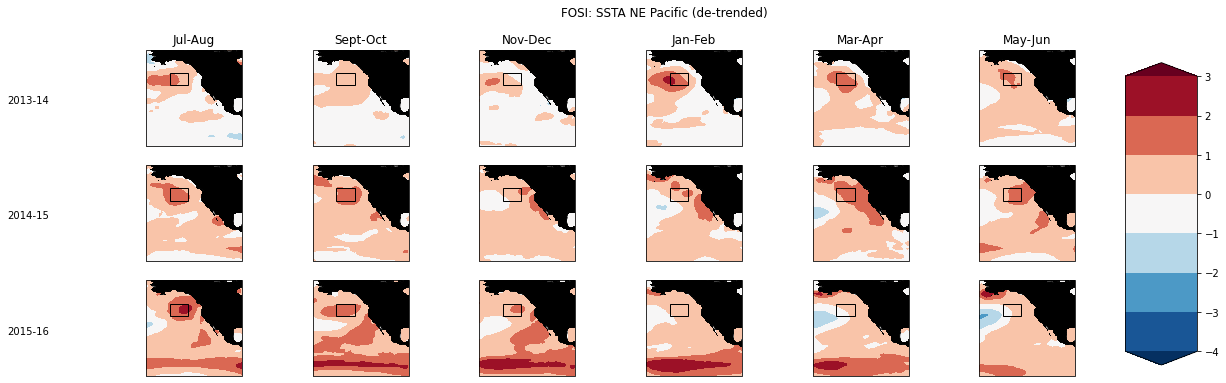

In [16]:
def panels(data,description,variable,depth,lower_bound,upper_bound, step,cmap):
    f, axs = plt.subplots(nrows=3,ncols=6,figsize=(20,6),
                          subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180))) 
    axs = axs.flatten()
    for i in range(0,18):
        im = axs[i].contourf(fosi.lon, fosi.lat, fosi.isel(time=i),
                         transform=ccrs.PlateCarree(), 
                         cmap=cmap,
                         levels=np.arange(lower_bound, upper_bound, step),
                         extend='both')
        axs[i].add_feature(cfeature.LAND, color='k')
        axs[i].add_patch(mpatches.Rectangle(xy=[210, 40], width=15, height=10,
                                    edgecolor='k',
                                    facecolor='none',
                                    transform=ccrs.PlateCarree())
                 )
    plt.suptitle("FOSI: " + description + " " + variable + " " + depth + " (de-trended)")
    axs[0].set_title("Jul-Aug"); axs[1].set_title("Sept-Oct")
    axs[2].set_title("Nov-Dec"); axs[3].set_title("Jan-Feb")
    axs[4].set_title("Mar-Apr"); axs[5].set_title("May-Jun")
    plt.text(-790,215,'2013-14')
    plt.text(-790,120,'2014-15')
    plt.text(-790,25,'2015-16')
    f.subplots_adjust(right=0.8)
    cbar_ax = f.add_axes([0.82, 0.15, 0.05, 0.7])
    f.colorbar(im, cax=cbar_ax,fraction=0.046,pad=0.04)
    
panels(tos,'SSTA','NE','Pacific',-4.0,4.0, 1.0,'RdBu_r')